# CIFAR-10 Image Classification Using Neural Networks

## 0. Loading the Necessary Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import plot_model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.layers import BatchNormalization
from keras.callbacks import EarlyStopping
import visualkeras
import warnings
warnings.filterwarnings('ignore')

## 1. Introduction to CIFAR-10 Dataset

#### Loading the CIFAR-10 dataset

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


#### Dataset Description

In [4]:
#Printing dataset properties
print('Shape of the Dataset')
print("Training data shape:", x_train.shape)
print("Training labels shape:", y_train.shape)
print("Testing data shape:", x_test.shape)
print("Testing labels shape:", y_test.shape)

Shape of the Dataset
Training data shape: (50000, 32, 32, 3)
Training labels shape: (50000, 1)
Testing data shape: (10000, 32, 32, 3)
Testing labels shape: (10000, 1)


In [5]:
#Unique values in y_train and y_test
unique_values_train = np.unique(y_train)
unique_values_test = np.unique(y_test)
print("Unique values in y_train:", unique_values_train)
print("Unique values in y_test:", unique_values_test)

Unique values in y_train: [0 1 2 3 4 5 6 7 8 9]
Unique values in y_test: [0 1 2 3 4 5 6 7 8 9]


In [6]:
#Printing number of samples, features, and classes for the training set
n_samples = x_train.shape[0]
n_features = x_train.shape[1:]
n_classes = len(unique_values_train)
print(f'Characteristics of train data:\nNumber of Samples: {n_samples}\nNumber of Features: {n_features}\nNumber of Classes: {n_classes}')

Characteristics of train data:
Number of Samples: 50000
Number of Features: (32, 32, 3)
Number of Classes: 10


In [7]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
print("Class labels:", class_names)

Class labels: ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


#### Significance of using CIFAR-10 dataset for learning image classification:
The CIFAR-10 dataset is crucial for image classification because it contains everyday objects, making it useful for tasks like object detection or understanding scenes. Its diverse classes, spanning animals, vehicles, and natural objects, ensure that models trained on CIFAR-10 can learn adaptable features applicable to a wide array of classification tasks. Widely adopted as a benchmark dataset, CIFAR-10 is instrumental in advancing research and education in the field of computer vision.

## 2. Data Preprocessing

#### Visualize and display images from the dataset:

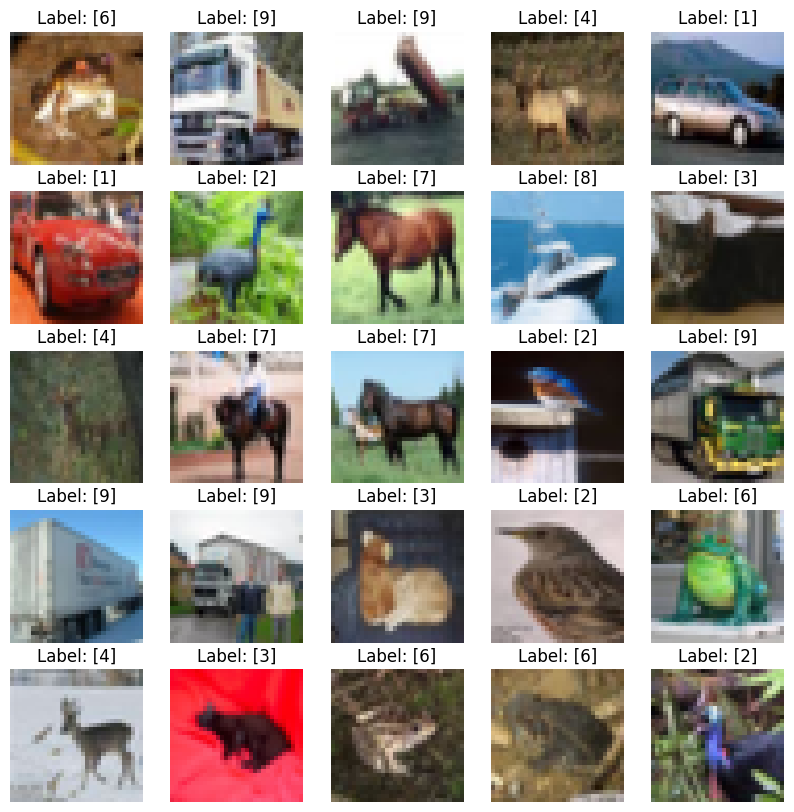

In [8]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(x_train[i])
    plt.title("Label: " + str(y_train[i]))
    plt.axis('off')
plt.show()

#### Normalizing the image pixel values:

In [9]:
x_train = x_train/255
x_test = x_test/255

#### Plotting the images from the training set with the class name:

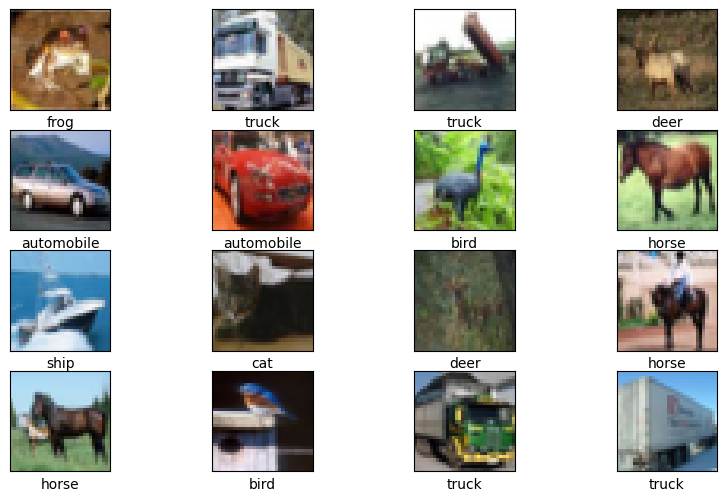

In [10]:
plt.figure(figsize=(10,6))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])
    plt.xlabel(class_names[y_train[i][0]]) #extra index as the labels for CIFAR 10 is an array
plt.show()

#### Convert class vectors to binary class matrices (one-hot encoding)

In [11]:
y_train_en = to_categorical(y_train, 10)
y_test_en = to_categorical(y_test, 10)
print('y_train_en.shape: ', y_train_en.shape)
print('y_train_en.shape: ', y_train_en.shape)

y_train_en.shape:  (50000, 10)
y_train_en.shape:  (50000, 10)


## 3. Building the Neural Network

#### Constructing a neural network using the Sequential model

In [12]:
model = Sequential()

#Adding multiple convolutional layers with Batch Normalization, max pooling and dropout layers
model.add(Conv2D(64,(4,4),input_shape=(32,32,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64,(4,4),input_shape=(32,32,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(128,(4,4),input_shape=(32,32,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128,(4,4),input_shape=(32,32,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(128,(4,4),input_shape=(32,32,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128,(4,4),input_shape=(32,32,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.35))
model.add(Flatten()) #adding the flatten layer

#Adding fully connected layers
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(n_classes, activation='softmax')) #final dense layer with softmax activation for multiclass classification (n_classes)

#### **Significance of each layer and activations used in the model above:**
**Batch Normalization Layer**: helps improve training stability and convergence by normalizing the activations. \
**Dropout Layer**: helps prevent overfitting by randomly dropping neurons during training. \
**Flatten Layer**: transforms the multi-dimensional output of the convolution layers into a one-dimensional vector. \
**Dense Layer**: helps capture complex patterns and relationships in the extracted features from the convolutional layers, aiding in high-level feature representation and classification.
##### **Activations:**
In our model, the final dense layer uses softmax activation for multiclass classification, as **softmax** produces probabilities for each class, making it suitable for classification tasks. And, the **ReLU** Activation helps introduce non-linearity and facilitate feature extraction.

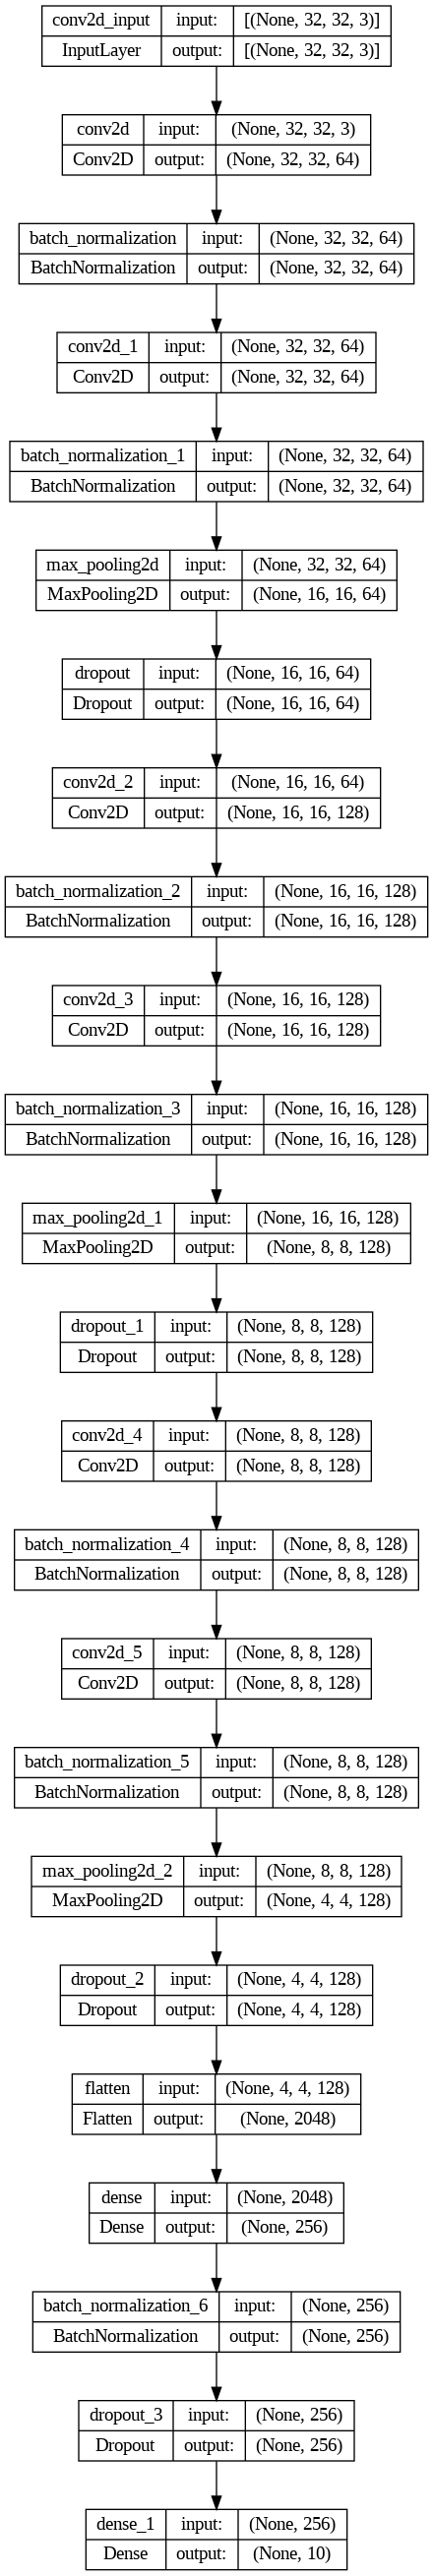

In [13]:
#visualizing the architecture of our neural network model
plot_model(model, show_shapes=True, show_layer_names=True)

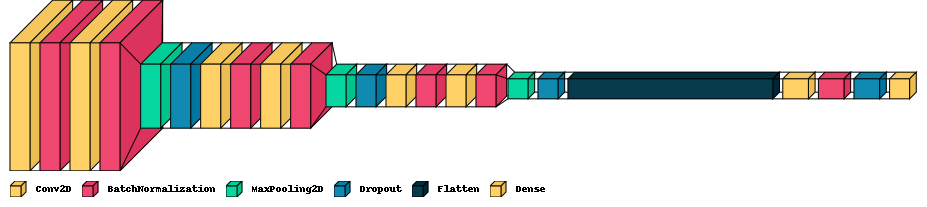

In [14]:
visualkeras.layered_view(model, legend=True)

## 4. Compiling the model

#### Compiling the model

In [15]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Categorical cross-entropy **loss** is suitable for multi-class classification tasks, optimizing model parameters to minimize classification errors. \
The Adam **optimizer** is an adaptive learning rate optimization algorithm that efficiently updates network weights, facilitating faster convergence and better performance. \
Accuracy **metrics** measure the proportion of correctly classified samples during training, providing insight into model performance. \
\
Overall, these configurations contribute to effective training by optimizing model parameters, managing learning rates, and evaluating classification accuracy.

In [16]:
# Print a summary of the model architecture
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        3136      
                                                                 
 batch_normalization (Batch  (None, 32, 32, 64)        256       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        65600     
                                                                 
 batch_normalization_1 (Bat  (None, 32, 32, 64)        256       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 64)        0         
 D)                                                              
                                                        

## 5. Training the model

In [17]:
# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

In [18]:
# Train the model
history = model.fit(x_train, y_train_en, epochs=50, batch_size = 32, verbose=1,
                    validation_data=(x_test, y_test_en), callbacks=[early_stopping])

## the above validation split allows for monitoring the model's performance on unseen data during training,
## helping to detect overfitting and guide model optimization.

Epoch 1/50
1563/1563 [==============================] - 24s 9ms/step - loss: 1.5652 - accuracy: 0.4702 - val_loss: 1.2880 - val_accuracy: 0.5459
Epoch 2/50
1563/1563 [==============================] - 13s 8ms/step - loss: 0.9284 - accuracy: 0.6757 - val_loss: 1.2951 - val_accuracy: 0.5773
Epoch 3/50
1563/1563 [==============================] - 13s 8ms/step - loss: 0.7486 - accuracy: 0.7434 - val_loss: 0.8021 - val_accuracy: 0.7282
Epoch 4/50
1563/1563 [==============================] - 13s 8ms/step - loss: 0.6342 - accuracy: 0.7831 - val_loss: 0.5687 - val_accuracy: 0.8037
Epoch 5/50
1563/1563 [==============================] - 13s 8ms/step - loss: 0.5476 - accuracy: 0.8147 - val_loss: 0.6337 - val_accuracy: 0.7907
Epoch 6/50
1563/1563 [==============================] - 13s 8ms/step - loss: 0.4784 - accuracy: 0.8372 - val_loss: 0.6493 - val_accuracy: 0.7879
Epoch 7/50
1563/1563 [==============================] - 13s 8ms/step - loss: 0.4223 - accuracy: 0.8560 - val_loss: 0.5071 - val_ac

#### Training Output Observations:
1. Both training loss and accuracy show improvement over epochs, indicating that the model is learning from the training data and becoming more accurate in its predictions.
2. The model seems to converge well as both training and validation metrics stabilize after a certain number of epochs, suggesting that further training may not significantly improve performance.
3. Dropout layers help mitigate overfitting, as indicated by the relatively consistent gap between training and validation performance.
4. The Adam optimizer helps in stabilizing the optimization process, leading to smoother convergence.

## 6. Evaluating the model

#### Evaluate the model using the test dataset


In [19]:
test_loss, test_acc = model.evaluate(x_test, y_test_en)

313/313 [==============================] - 1s 3ms/step - loss: 0.5279 - accuracy: 0.8652


#### Report and interpret the test loss and accuracy

In [20]:
print("Test Loss:", test_loss)
print("Test Accuracy:", test_acc)

Test Loss: 0.5279284715652466
Test Accuracy: 0.8651999831199646


## 7. Visualization of Training Progress

In [21]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

#### Plot training and validation loss

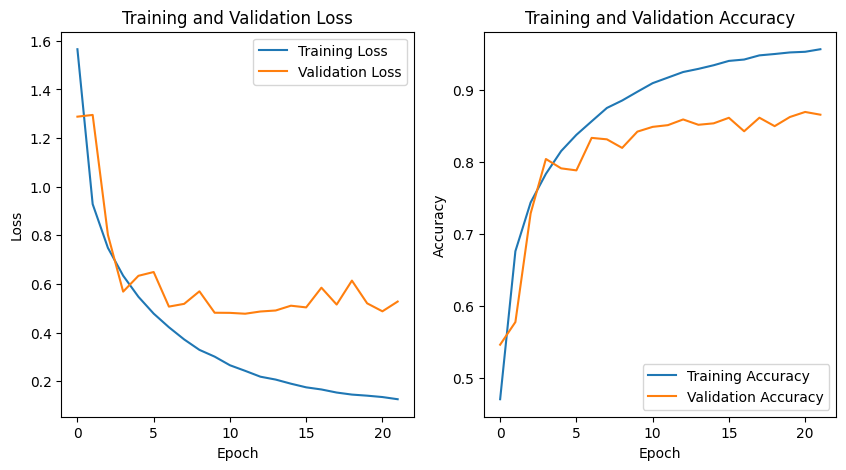

In [22]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

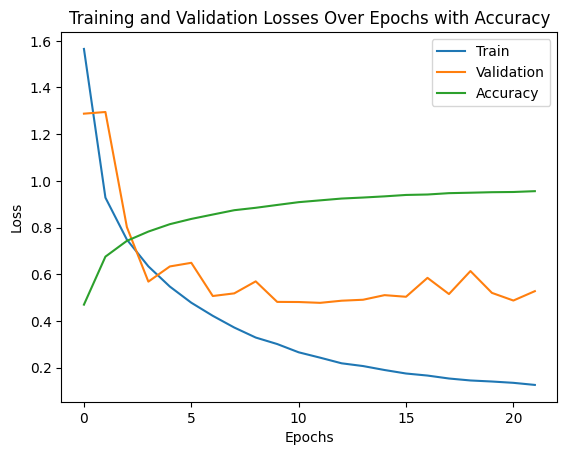

In [23]:
# Visualizing Training and Validation Losses Over Epochs with Accuracy

def plotloss(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.plot(history.history['accuracy'])
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Validation Losses Over Epochs with Accuracy')
    plt.legend(['Train', 'Validation', 'Accuracy'])
    plt.show()
plotloss(history)

## 8. Making Predictions

In [24]:
# Use the model to make predictions on the test data
predictions = model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


### Plotting the result
#### Visualize and discuss the accuracy of predictions versus actual labels.

In [25]:
# Extract predicted labels and true labels
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(y_test_en, axis=1)

# Define categories for CIFAR-10 dataset
categories = ['airplane', 'automobile', 'bird', 'cat', 'deer',
              'dog', 'frog', 'horse', 'ship', 'truck']

# Map predicted labels and true labels to category names
predicted_categories = [categories[label] for label in predicted_labels]
true_categories = [categories[label] for label in true_labels]

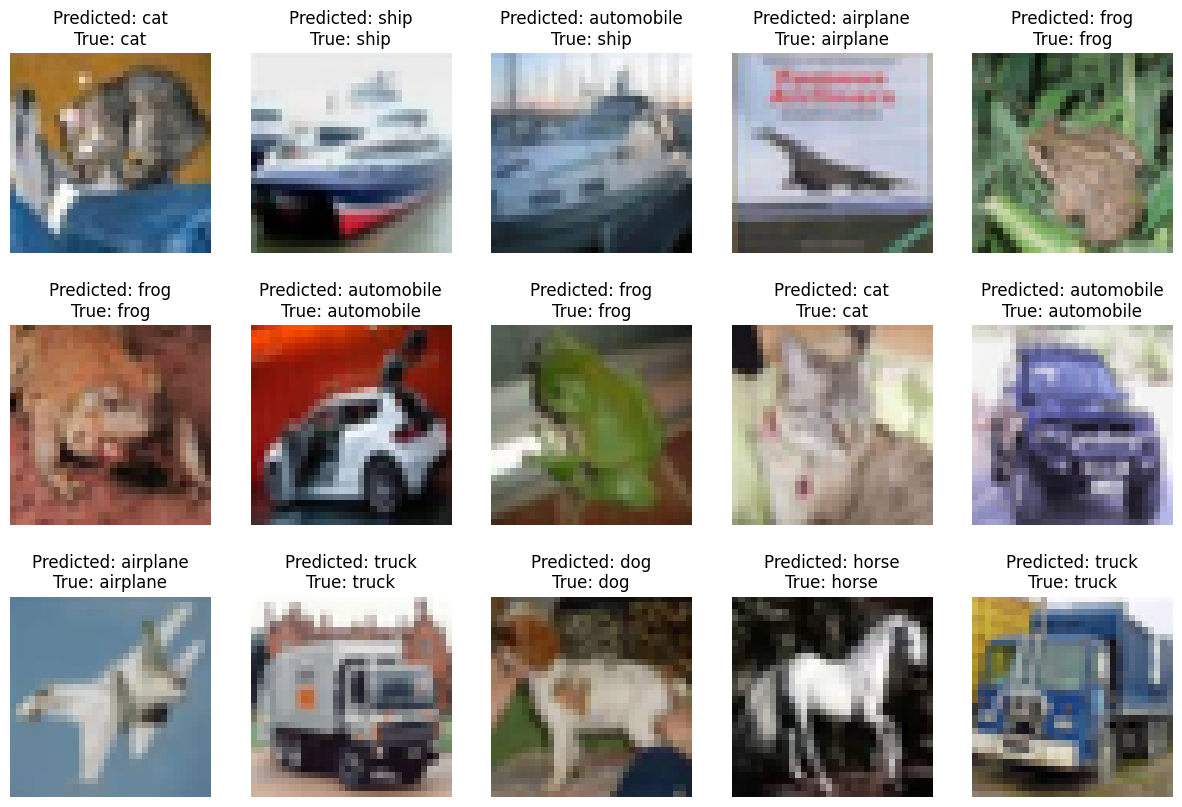

In [26]:
# Plot images along with predicted and true categories
def plot_images(images, predicted_categories, true_categories):
    plt.figure(figsize=(15, 10))
    for i in range(len(images)):
        plt.subplot(3, 5, i + 1)
        plt.imshow(images[i])
        plt.title("Predicted: {}\nTrue: {}".format(predicted_categories[i], true_categories[i]))
        plt.axis('off')
    plt.show()

# Plot images with predicted and true categories
plot_images(x_test[:15], predicted_categories[:15], true_categories[:15])

# Conclusion

### Summarized key learnings:

In this project, we successfully trained a convolutional neural network (CNN) on the CIFAR-10 dataset for image classification. \
We learned about the importance of data preprocessing, the construction of a deep learning model using CNN architecture with batch normalization and dropout layers, and the significance of choosing appropriate activation functions and regularization techniques. \
\
The model demonstrated promising performance during training, achieving an accuracy of **95.61%** on *the training set* and **86.52%** on the *validation set*.\
\
However, there were signs of overfitting as indicated by the increasing gap between training and validation accuracies after a certain number of epochs. To address this, we employed regularization techniques such as dropout layers and batch normalization, which helped in mitigating overfitting to some extent.

### Potential improvements and real-world applicability of the model

For *potential improvements*, further experimentation with hyperparameters such as learning rate, batch size, and network architecture could be explored. Additionally, techniques like data augmentation and transfer learning could be leveraged to enhance model generalization and performance on unseen data. \
\
In terms of *real-world applicability*, the trained model can be deployed in various image classification tasks, such as identifying objects in photographs or monitoring systems, medical imaging for diagnosing diseases, autonomous vehicles by detecting obstacles, and e-commerce platforms through personalized recommendations.\
With its versatility and accuracy, the model serves as a valuable tool for leveraging artificial intelligence in real-world scenarios, offering solutions to complex problems and driving advancements across industries.
